In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [83]:
xrd_data = pd.read_csv('27_39.txt', delimiter='   ', engine='python', header=None)
#xrd_data.to_csv('xed.csv', index = False)

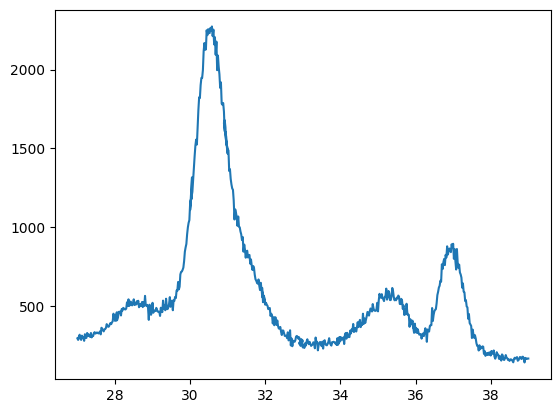

In [84]:
plt.plot(xrd_data[0], xrd_data[1])

In [85]:
def Gauss(x: list, FWHM: float, center: float):
    x = np.array(x)
    sigma = FWHM/(2 * np.sqrt(2 * np.log(2)))
    a_g = 1 / (sigma * np.sqrt(2 * np.pi))
    b_g = 4 * np.log(2) / FWHM ** 2
    return a_g * np.exp(- b_g * (x - center) ** 2)

def Lorentz(x: list, FWHM: float, center: float):
    return 1 / np.pi * (FWHM / 2) / ((x - center) ** 2 + (FWHM / 2) ** 2)

def PsevdoVoid(x: list, FWHM: float, center: float, n: float, I: float):
    gaus = Gauss(x, FWHM, center)
    lorentz = Lorentz(x, FWHM, center)
    high = 2 * I / (np.pi * FWHM) * (1 + n * (np.sqrt(np.pi * np.log(2)) - 1))
    return high * (n * gaus + (1-n) * lorentz)


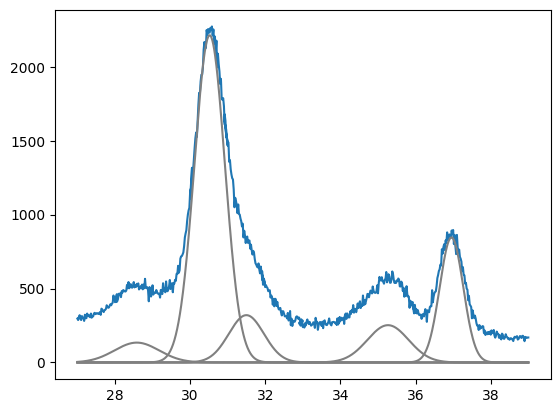

In [86]:
plt.plot(xrd_data[0], xrd_data[1])
x = np.linspace(27,39,1000)
#plt.plot(x, Gauss(x, 0.95389, 30.52))
#plt.plot(x, Lorentz(x, 0.95389, 30.52))
plt.plot(x, PsevdoVoid(x, 1.39878, 28.5808, 1, 298), color = 'gray')
plt.plot(x, PsevdoVoid(x, 0.95389, 30.52, 1, 2282), color = 'gray')
plt.plot(x, PsevdoVoid(x, 1.1, 31.497, 1, 439), color = 'gray')
plt.plot(x, PsevdoVoid(x, 1.29, 35.266, 1, 476), color = 'gray')
plt.plot(x, PsevdoVoid(x, 0.73521, 36.956, 1, 518), color = 'gray')